In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

# fix tik mpl
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "times",
    'font.size': 20,
})

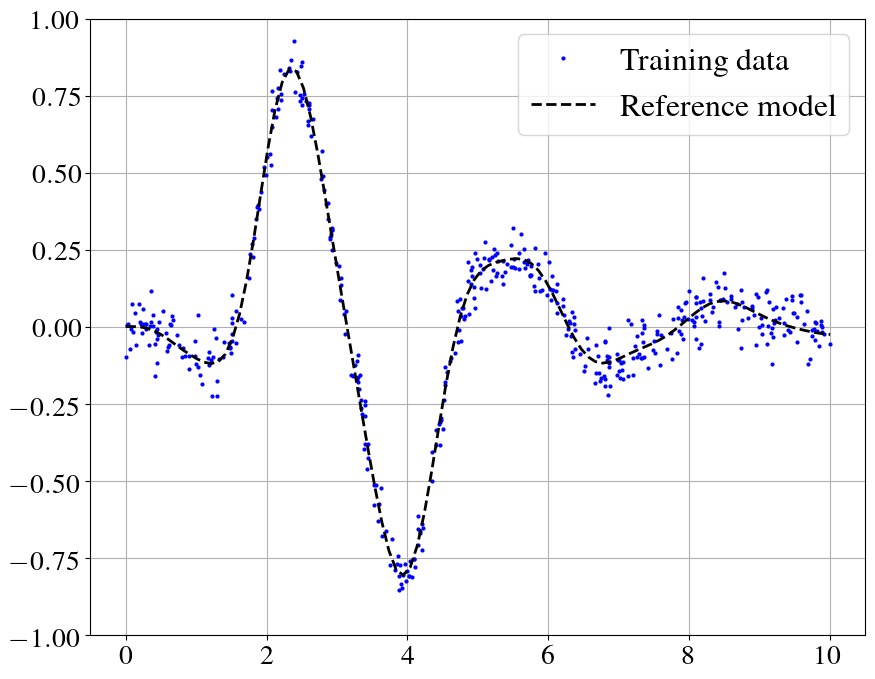

In [2]:
S = dataset.HEADataset() #MagmanDatasetScaled() #TrigonDataset()
S.sample(size=500, noise=0.05)
#S.load('data/magman.csv')
S.plot()

#plt.savefig("magman-compr-base.png", format="png", bbox_inches='tight')

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

In [6]:
from matplotlib import pyplot as plt

tspline_conn = taylor_spline.TaylorSplineConnector()

#Y = []
#X = np.linspace(S.xl, S.xu, 100)
#for x in X:
#    tsplines = tspline_conn.fit(S, 4, silent=True, x0_in=x)
#    Y.append(tsplines[0].y(x))
tsplines = tspline_conn.fit(S, 3, silent=True, x0_in=1.)  # 0.6

ExpRadius = 2.0
Fitting on x0 = 1.0 to [-1.0, 3.0]


Fitness: -0.2782788870220501


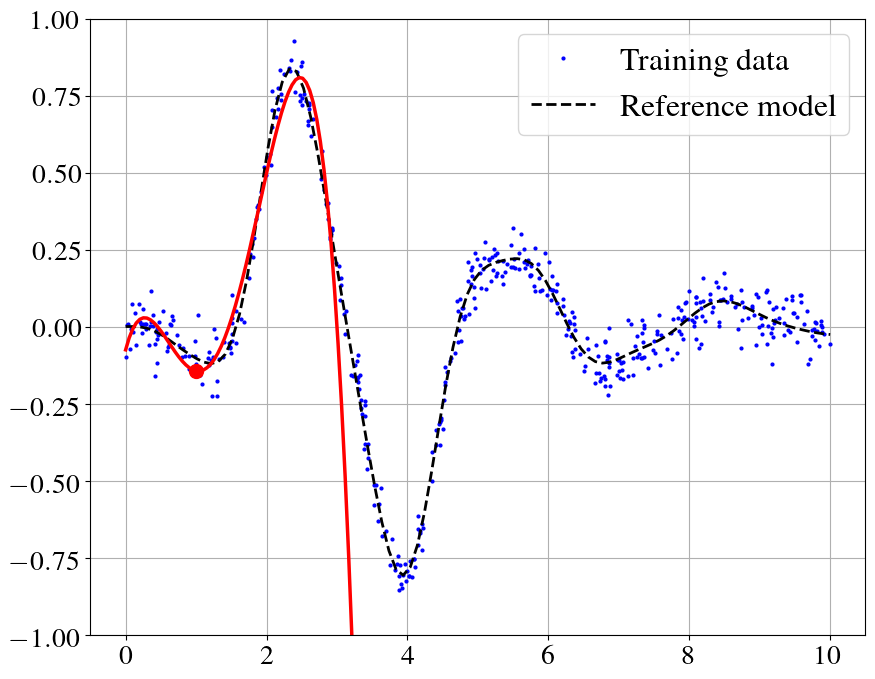

In [7]:
S.plot()
for ts in tsplines:
    print(f"Fitness: {ts.fitness(S)}")
    ts.plot(show=False)
#plt.plot(X, Y)
#plt.show()

plt.savefig("magman-hea-fit1.png", format="png", bbox_inches='tight')